In [18]:
import pandas as pd
df_1=pd.read_csv('2023.csv')

In [2]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_1['ORIGIN_CITY'] = le.fit_transform(df_1['ORIGIN_CITY'])
df_1['DEST_CITY'] = le.fit_transform(df_1['DEST_CITY'])
df_1['AIRLINE_CODE'] = le.fit_transform(df_1['AIRLINE_CODE'])
df_1['DOT_CODE'] = le.fit_transform(df_1['DOT_CODE'])
df_1['FL_NUMBER'] = le.fit_transform(df_1['FL_NUMBER'])
df_1['ORIGIN'] = le.fit_transform(df_1['ORIGIN'])
df_1['DEST'] = le.fit_transform(df_1['DEST'])
df_1['CANCELLATION_CODE'] = le.fit_transform(df_1['CANCELLATION_CODE'])
df_1

# Delete all missing data (or we can give them the mean value)
df_1=df_1.dropna()

# Seperate the target variable: Total delay time
df_target = df_1["ARR_DELAY"]

In [19]:
df_1.shape

(4545422, 33)

In [3]:
# Eliminate the date_column first
df_1 = df_1.drop('FL_DATE', axis=1)

In [4]:
Dep_time= df_1["DEP_TIME"].median()
Dep_Delay=df_1["DEP_DELAY"].median()
Taxi_out=df_1["TAXI_OUT"].median()
Wheels_off=df_1["WHEELS_OFF"].median()
Distance=df_1["DISTANCE"].median()

Dep_time_dv= df_1["DEP_TIME"].std()
Dep_Delay_dv=df_1["DEP_TIME"].std()
Taxi_out_dv=df_1["TAXI_OUT"].std()
Wheels_off_dv=df_1["WHEELS_OFF"].std()
Distance_dv=df_1["DISTANCE"].std()

In [5]:
# Before finding correlation, we standardizr our predictor variables to eliminate the effect of unit
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
standardized_data= scaler.fit_transform(df_1)
standardized_data

array([[-1.59145481,  0.50595997,  1.71360317, ...,  0.        ,
         0.55736108, -1.35754626],
       [-1.59145481,  0.50595997,  1.71563514, ...,  0.        ,
         0.55736108, -1.35754626],
       [-1.59145481,  0.50595997,  1.71834443, ...,  0.        ,
         0.55736108, -1.58590415],
       ...,
       [ 1.33406449,  2.14284503,  0.89404202, ...,  0.        ,
         1.43805232, -1.7000831 ],
       [ 1.33406449,  2.14284503,  0.88930076, ...,  0.        ,
         1.43805232, -1.7000831 ],
       [ 1.33406449,  2.14284503,  0.88523682, ...,  0.        ,
         1.43805232, -1.7000831 ]])

In [6]:
# Convert the standardized data back to a DataFrame
standardized_df = pd.DataFrame(standardized_data, columns=df_1.columns, index=df_1.index)

# Double check if there is any missing data in the dataset
missing_data_exists = standardized_df.isna().any().any()
missing_data_exists

False

In [17]:
Dep_time_s=standardized_df["DEP_TIME"].median()
Dep_Delay_s=standardized_df["DEP_DELAY"].median()
Taxi_out_s=standardized_df["TAXI_OUT"].median()
Wheels_off_s=standardized_df["WHEELS_OFF"].median()
Distance_s=standardized_df["DISTANCE"].median()

print("Dep_time_median: " + str(Dep_time_s))
print("Dep_Delay_median: " + str(Dep_Delay_s))
print("Taxi_out_median: " + str(Taxi_out_s))
print("Wheels_off_median:" + str(Wheels_off_s))


Dep_time_median: 0.16007658360298366
Dep_Delay_median: -0.25223266737884115
Taxi_out_median: -0.3179163857813594
Wheels_off_median:0.15181161082364655


In [8]:
# Correclation among all variables
std_df_corr= standardized_df.corr()
std_df_corr

,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,FL_YEAR,FL_MONTH,FL_DAY
AIRLINE_CODE,1.000000,-0.116682,0.210962,0.033340,0.015643,0.031790,0.009058,0.035106,0.047590,-0.080858,...,-0.166774,-0.165128,-0.057958,-0.005521,-0.015041,-0.002205,-0.057632,NaN,0.006551,0.007843
DOT_CODE,-0.116682,1.000000,0.201167,-0.011234,0.057302,-0.031528,0.026986,-0.030497,-0.042979,0.042495,...,0.028294,0.013411,0.017259,0.026411,0.111378,0.009444,0.002530,NaN,-0.029233,-0.003447
FL_NUMBER,0.210962,0.201167,1.000000,-0.007460,-0.003451,-0.026126,-0.021657,-0.035008,-0.003696,-0.003608,...,-0.315026,-0.333325,0.010828,0.043522,-0.016312,-0.005692,-0.019019,NaN,0.011248,0.008817
ORIGIN,0.033340,-0.011234,-0.007460,1.000000,0.738706,-0.021849,-0.019369,-0.051072,-0.042769,-0.005367,...,0.061158,0.080593,-0.008248,-0.009268,0.000169,-0.006609,0.009084,NaN,-0.022264,0.000156
ORIGIN_CITY,0.015643,0.057302,-0.003451,0.738706,1.000000,-0.025618,-0.033753,-0.047182,-0.036601,0.003468,...,0.079461,0.084937,-0.004968,-0.008319,0.015115,-0.003497,0.012126,NaN,-0.020948,-0.000077
DEST,0.031790,-0.031528,-0.026126,-0.021849,-0.025618,1.000000,0.745414,0.020665,0.013345,-0.021673,...,0.092407,0.080366,-0.007433,-0.013369,-0.024357,-0.002469,-0.012735,NaN,-0.019286,0.002511
DEST_CITY,0.009058,0.026986,-0.021657,-0.019369,-0.033753,0.745414,1.000000,0.035171,0.024711,-0.021036,...,0.089166,0.085240,-0.010741,-0.012717,-0.005314,-0.002650,-0.013608,NaN,-0.022435,0.000870
CRS_DEP_TIME,0.035106,-0.030497,-0.035008,-0.051072,-0.047182,0.020665,0.035171,1.000000,0.738016,0.031493,...,-0.052933,-0.036716,-0.047034,0.004083,-0.052327,0.000974,0.096716,NaN,0.072501,0.004908
DEP_TIME,0.047590,-0.042979,-0.003696,-0.042769,-0.036601,0.013345,0.024711,0.738016,1.000000,0.008689,...,-0.083425,-0.078185,-0.069145,-0.012702,-0.030345,-0.000166,0.087041,NaN,0.049569,0.001566
DEP_DELAY,-0.080858,0.042495,-0.003608,-0.005367,0.003468,-0.021673,-0.021036,0.031493,0.008689,1.000000,...,-0.017917,0.004981,0.695406,0.252330,0.101439,0.020396,0.568199,NaN,0.041256,0.009357


In [9]:
# select the attributes based on the high correlation between ARR_DELAY and other attribute
std_df_corr['ARR_DELAY']

AIRLINE_CODE              -0.085445
DOT_CODE                   0.057676
FL_NUMBER                  0.004374
ORIGIN                    -0.003608
ORIGIN_CITY                0.005795
DEST                      -0.025184
DEST_CITY                 -0.022067
CRS_DEP_TIME               0.009156
DEP_TIME                  -0.011687
DEP_DELAY                  0.981079
TAXI_OUT                   0.019705
WHEELS_OFF                -0.023595
WHEELS_ON                 -0.071725
TAXI_IN                    0.020523
CRS_ARR_TIME               0.002710
ARR_TIME                  -0.073780
ARR_DELAY                  1.000000
CANCELLED                       NaN
CANCELLATION_CODE               NaN
DIVERTED                        NaN
CRS_ELAPSED_TIME           0.014937
ELAPSED_TIME               0.007956
AIR_TIME                   0.001476
DISTANCE                   0.006847
DELAY_DUE_CARRIER          0.693692
DELAY_DUE_WEATHER          0.262089
DELAY_DUE_NAS              0.189509
DELAY_DUE_SECURITY         0

In [10]:
# Based on our observation, we chose three most related predictor to predict our delay time.
new_df = standardized_df[["DEP_TIME",'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF', "ARR_DELAY"]]

In [11]:
# Split the 25% data into test data, 75% data into train data
from sklearn.model_selection import train_test_split
X= new_df[["DEP_TIME",'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF']]
y = df_target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_test.head(10)

,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF
2973849,-0.790997,0.295403,0.279344,-0.757943
4409782,-1.215411,-0.091719,-0.317916,-1.190170
1074664,-1.001275,0.153773,0.412069,-0.959900
460206,0.997330,-0.403305,-0.384279,1.048354
3717893,-1.194191,-0.648796,-0.782453,-1.182620
457243,-1.317657,-0.450514,0.146620,-1.201495
2052567,-1.213482,-0.365537,-0.716090,-1.199607
3455428,1.572218,-0.705448,0.876605,-2.883219
3681084,-2.907281,0.163215,-0.649728,-2.854907
4512093,0.804415,-0.120045,-0.915177,0.769010


In [12]:
# predict the delay time
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)
print(reg.predict(X_test))
print(reg.predict(X_test.iloc[[0]]))

[105.59245308  58.65343621  92.94512298 ...  63.45367422  20.1684776
  74.40811828]
[105.59245308]


In [30]:
# senario 1 
# Standardize the input data
Option_STL_ORD = (1734- Dep_time)/Dep_time_dv
Option_ORD_TPE = (2330- Dep_time)/Dep_time_dv
Option_STL_SEA = (1420- Dep_time)/Dep_time_dv
Option_SEA_TPE = (10- Dep_time)/Dep_time_dv

# Create the input dataset 
data_Lilo = {"DEP_TIME":[Option_STL_ORD,Option_ORD_TPE,Option_STL_SEA,Option_SEA_TPE],
        'DEP_DELAY':[Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s], 
        'TAXI_OUT':[Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s], 
        'WHEELS_OFF':[Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s],
       }

df_test_lilo = pd.DataFrame(data_Lilo)
print(df_test_lilo)

# Input the new dataset into model
flight_time= reg.predict(df_test_lilo)
print(reg.predict(df_test_lilo))

# Predictive arrival delay time in two options 
STL_ORD_TPE=flight_time[0]+ flight_time[1]
STL_SEA_TPE=flight_time[2]+ flight_time[3]
print("STL_ORD_TPE: "+str(STL_ORD_TPE)) 
print("STL_SEA_TPE: "+str(STL_SEA_TPE))

   DEP_TIME  DEP_DELAY  TAXI_OUT  WHEELS_OFF
0  0.229569  -0.252233 -0.317916    0.151812
1  1.379345  -0.252233 -0.317916    0.151812
2 -0.376185  -0.252233 -0.317916    0.151812
3 -3.096293  -0.252233 -0.317916    0.151812
[40.51618266 38.58086631 41.53579564 46.11431251]
STL_ORD_TPE: 79.09704896963453
STL_SEA_TPE: 87.6501081418329


In [14]:
# senario 2

time_00_30 = (30 - Dep_time)/Dep_time_dv
time_01_30 = (130 - Dep_time)/Dep_time_dv
time_02_30 = (230 - Dep_time)/Dep_time_dv
time_03_30 = (330 - Dep_time)/Dep_time_dv
time_04_30 = (430 - Dep_time)/Dep_time_dv
time_05_30 = (530 - Dep_time)/Dep_time_dv

x0 = (30 - Dep_time)/Dep_time_dv
x1 = (130 - Dep_time)/Dep_time_dv
x2 = (230 - Dep_time)/Dep_time_dv
x3 = (330 - Dep_time)/Dep_time_dv
x4 = (430 - Dep_time)/Dep_time_dv
x5 = (530 - Dep_time)/Dep_time_dv

x6 = (630 - Dep_time)/Dep_time_dv
x7 = (730 - Dep_time)/Dep_time_dv
x8 = (830 - Dep_time)/Dep_time_dv
x9 = (930 - Dep_time)/Dep_time_dv
x10 = (1030 - Dep_time)/Dep_time_dv
x11 = (1130 - Dep_time)/Dep_time_dv

x12 = (1230 - Dep_time)/Dep_time_dv
x13 = (1330 - Dep_time)/Dep_time_dv
x14 = (1430 - Dep_time)/Dep_time_dv
x15 = (1530 - Dep_time)/Dep_time_dv
x16 = (1630 - Dep_time)/Dep_time_dv
x17 = (1730 - Dep_time)/Dep_time_dv

x18 = (1830 - Dep_time)/Dep_time_dv
x19 = (1930 - Dep_time)/Dep_time_dv
x20 = (2030 - Dep_time)/Dep_time_dv
x21 = (2130 - Dep_time)/Dep_time_dv
x22 = (2230 - Dep_time)/Dep_time_dv
x23 = (2330 - Dep_time)/Dep_time_dv

data_1 = {"DEP_TIME":[x0,x1,x2,x3,x4,x5],
        'DEP_DELAY':[Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s], 
        'TAXI_OUT':[Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s], 
        'WHEELS_OFF':[Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s]
       }

data_2 = {"DEP_TIME":[x6,x7,x8,x9,x10,x11],
        'DEP_DELAY':[Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s], 
        'TAXI_OUT':[Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s], 
        'WHEELS_OFF':[Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s]
       }

data_3 = {"DEP_TIME":[x12,x13,x14,x15,x16,x17],
        'DEP_DELAY':[Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s], 
        'TAXI_OUT':[Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s], 
        'WHEELS_OFF':[Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s]
       }

data_4 = {"DEP_TIME":[x18,x19,x20,x21,x22,x23],
        'DEP_DELAY':[Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s,Dep_Delay_s], 
        'TAXI_OUT':[Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s,Taxi_out_s], 
        'WHEELS_OFF':[Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s,Wheels_off_s]
       }

df_test_1 = pd.DataFrame(data_1)
df_test_2 = pd.DataFrame(data_2)
df_test_3 = pd.DataFrame(data_3)
df_test_4 = pd.DataFrame(data_4)
df_test_1

,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF
0,-3.057710,-0.252233,-0.317916,0.151812
1,-2.864794,-0.252233,-0.317916,0.151812
2,-2.671879,-0.252233,-0.317916,0.151812
3,-2.478964,-0.252233,-0.317916,0.151812
4,-2.286048,-0.252233,-0.317916,0.151812
5,-2.093133,-0.252233,-0.317916,0.151812


In [31]:
# Morning_total_delay = 0
# for i in reg.predict(df_test_morning):
#     Morning_total_delay += i
# Morning_average_delay = Morning_total_delay/4
# print(Morning_average_delay)

sum1 = 0
for i in reg.predict(df_test_1):
    sum1 += i
avg1=sum1/4
print(avg1)

sum2 = 0
for i in reg.predict(df_test_2):
    sum2 += i
avg2=sum2/4
print(avg2)

sum3 = 0
for i in reg.predict(df_test_3):
    sum3 += i
avg3=sum3/4
print(avg3)

sum4 = 0
for i in reg.predict(df_test_4):
    sum4 += i
avg4=sum4/4
print(avg4)

67.85636284891812
64.93390527299613
62.01144769707413
59.088990121152136


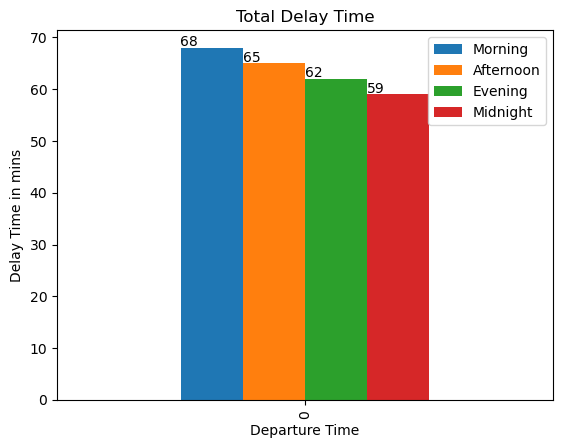

In [35]:
import matplotlib.pyplot as plt

data_draw = {
    'Morning': [round(avg1)],
    'Afternoon': [round(avg2)],
    'Evening': [round(avg3)],
    'Midnight': [round(avg4)]
}

df_final = pd.DataFrame(data_draw)
ax = df_final.plot(kind='bar', legend=True)


plt.title('Total Delay Time')
plt.xlabel('Departure Time')
plt.ylabel('Delay Time in mins')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()
